# Praktikum Visi Komputer
## Modul ke-7

## Histogram dan Thresholding

Pada modul ini, kita akan mempelajari tentang beberapa dasar dari pemprosesan citra seperti histogram, thresholding yang sangat berguna pada visi komputer.


### Image Sampling and Quantization

Jenis citra
- Citra biner : hanya mengandung piksel berwarna hitam (0) atau putih (1).
- Citra grayscale : mengandung piksel yang bernilai dari hitam (0), shade of gray (1-254), putih (255).
- Citra warna : memiliki beberapa channel warna. Dapat direpresentasikan dengan beberapa model warna yang berbeda (RGB, HSV, YUV, dan lainnya)

Sampling dan resolusi

Citra sebenarnya adalah sampel, sebab sifatnya tidak continuous (berlanjut). Citra terdiri dari piksel yang diskrit dengan ukuran dan kepadatan (*density*) tertentu.

Resolusi adalah parameter sampling yang ditulis dalam bentuk *dots per inch* (DPI). Nilai standar DPI untuk suatu layar adalah 72 DPI. Piksel akan dikuantisasi (*quantization*). Kuantisasi (*quantization*) merupakan proses mendigitasi intensitas sinyal objek pada koordinat piksel yang menjadi sampel. Lihat gambar di bawah agar dapat lebih paham.

<a href="https://im.ge/i/orqUDJ"><img src="https://i.im.ge/2021/10/13/orqUDJ.md.png" alt="orqUDJ.md.png" border="0" width="50%" height="50%"></a>

Berikut beberapa perbedaan resolusi.
[![orqhEy.md.png](https://i.im.ge/2021/10/13/orqhEy.md.png)](https://im.ge/i/orqhEy)


### Histogram

Histogram akan mengukur frekuensi kecerahan (*brightness*) di dalam suatu citra: berapa banyak nilai piksel tertentu muncul pada suatu citra. Histogram dapat membantu kita mendeteksi fitur tertentu pada citra, seperti:
- langit dengan awan sedikit: histogram yang tidak terlalu bergerigi menunjukkan warna yang konsisten
- rumput: histogram yang bergerigi menunjukkan banyaknya variasi pada warna.
[![orqYfC.md.png](https://i.im.ge/2021/10/13/orqYfC.md.png)](https://im.ge/i/orqYfC)

Histogram dapat digunakan untuk menyediakan deskripsi terukur dari bentuk sesuatu, sehingga dapat menjadi input pada classifier. Histogram sangatlah lazim digunakan pada setiap aspek dari visi komputer. Penggunaanya seperti pada:
- histogram grayscale untuk thresholding. 
- histogram untuk mengetahui keseimbangan warna putih
- histogram warna untuk pelacakan objek dalam citra (pada algoritma CamShift)
- histogram warna dapat digunakan untuk fitur
- histogram dari gradient citra untuk membentuk deskriptor HOG dan SIFT
- histogram untuk merepresentasikan bag-of-visual-words pada pencarian citra dan *machine learning*

Jadi histogram ini sangatlah penting karena histogram menangkap distribusi frekuensi dan sekumpulan data. Pengamatan terhadap distribusi frekuensi ini merupakan cara yang umum digunakan mulai dari teknik sederhana pada pemprosesan citra hingga algoritma kompleks pada *machine learning*. Histogram dapat divisualisasikan sebagai grafik (atau plot) yang memberikan intuisi tingkat tinggi dari distribusi intensitas (nilai piksel). 

Di sini kita akan mengasumsikan ruang warna RGB, sehingga nilai piksel akan berada dalam kisaran 0 hingga 255. Saat memplot histogram, sumbu x berfungsi sebagai "bin". Jika kita membuat histogram dengan 256 bin, maka kita secara efektif menghitung berapa kali setiap nilai piksel muncul. Sebaliknya, jika kita hanya menggunakan 2 bin (berspasi sama), maka kita menghitung berapa kali piksel berada dalam kisaran [0, 128] atau [128, 255]. Berapa banyak piksel yang di '*binned*' pada sumbu x akan diplotkan nilainya pada sumbu y. Contoh penggambaran histogram dapat dilihat pada gambar di bawah.

<a href="https://im.ge/i/orsLjq"><img src="https://i.im.ge/2021/10/13/orsLjq.md.png" alt="orsLjq.md.png" border="0"></a>

Kita akan lihat contoh sederhana pada gambar di bawah. Anggap kita punya citra 5x5 dengan nilai piksel antara 0 hingga 4. Langkah pertama dalam membuat histogram, kita buat terlebih dahulu tabel histogram, dengan menghitung berapa banyak jumlah untuk setiap intensitas piksel. Kemudian kita dapat dengan mudah menghasilkan histogram dengan membuat *bar chart* berdasarkan tabel histogram tersebut.

[![orstjc.png](https://i.im.ge/2021/10/13/orstjc.png)](https://im.ge/i/orstjc)

<b>Gambar 1. Contoh perhitungan histogram</b>

Langkah-langkah membuat histogram tersebut dapat dilihat pada kode program di bawah ini.

In [4]:
#program berisi fungsi untuk membuat histogram
import matplotlib.pyplot as plt
import numpy as np
import cv2

def generate_histogram(img, do_print):
    """
    @params: img: can be a grayscale or color image. We calculate the Normalized histogram of this image.
    @params: do_print: if or not print the result histogram
    @return: will return both histogram and the grayscale image 
    """
    if len(img.shape) == 3: # img is colorful, so we convert it to grayscale
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
            
    '''normalizing the Histogram''' #optional
    #gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if do_print:
        print_histogram(gr_hist, name="n_h_img", title="Normalized Histogram")
    return gr_hist, gr_img
  
def print_histogram(_histrogram, name, title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_" + name)
    plt.show()
    

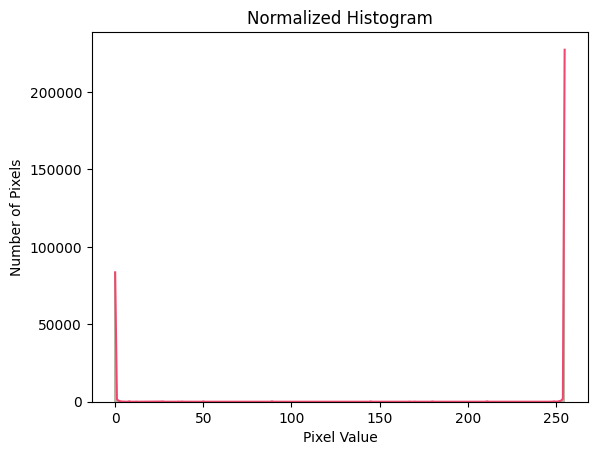

(array([8.35620e+04, 1.47200e+03, 6.13000e+02, 2.64000e+02, 1.15000e+02,
        5.10000e+01, 2.30000e+01, 1.70000e+01, 2.77000e+02, 1.70000e+01,
        8.00000e+00, 1.30000e+01, 8.30000e+01, 1.00000e+01, 1.50000e+01,
        7.00000e+00, 4.00000e+00, 8.00000e+00, 7.00000e+00, 1.00000e+01,
        1.00000e+01, 4.00000e+00, 8.00000e+00, 3.00000e+00, 6.00000e+00,
        6.00000e+00, 1.14000e+02, 1.94000e+02, 1.30000e+01, 3.00000e+00,
        5.00000e+00, 3.00000e+00, 1.30000e+01, 7.00000e+00, 2.00000e+00,
        5.00000e+00, 9.30000e+01, 1.10000e+01, 1.34000e+02, 2.00000e+01,
        1.20000e+01, 6.00000e+00, 4.00000e+00, 6.00000e+00, 4.00000e+00,
        9.00000e+00, 3.00000e+00, 3.00000e+00, 5.00000e+00, 6.00000e+00,
        1.90000e+02, 3.00000e+00, 4.00000e+00, 5.00000e+00, 3.00000e+00,
        2.00000e+00, 4.00000e+00, 4.00000e+00, 1.00000e+00, 6.00000e+00,
        5.00000e+00, 1.10000e+01, 1.00000e+00, 7.00000e+00, 4.00000e+00,
        4.00000e+00, 5.00000e+00, 3.00000e+00, 6.00

In [5]:
#Kita akan coba fungsi di atas dengan menggunakan gambar yang terdiri dari warna hitam dan putih
#download di https://i.im.ge/2021/10/13/orsCTG.png

img = cv2.imread('gambar/gambar 7.png')
generate_histogram(img, True)


Kode program di atas merupakan program untuk melakukan kalkulasi histogram. OpenCV juga memiliki method/fungsi khusus untuk melakukan kalkulasi histogram yaitu `cv2.calcHist(images,channels,mask,histSize,ranges)`.
- images: merupakan citra yang akan dikalkulasikan histogramnya.
- channels: berupa indeks dari channel yang akan dihitung histogramnya. Untuk menghitung histogram dari grayscale maka nilainya adalah [0]. Untuk menghitung histogram dari channel RGB, maka masing-masing nilainya [0, 1, 2].
- mask: None jika tidak pakai mask.
- histSize: berupa jumlah bin yang akan digunakan ketika menghitung histogram. [32,32,32] merupakan contoh 32 bin untuk setiap channel. Ukuran bin bisa saja beda. 
- ranges: berupa rentang dari nilai piksel yang mungkin. Normalnya [0, 256] untuk setiap channel pada RGB, tapi untuk selain RGB bisa saja berbeda.


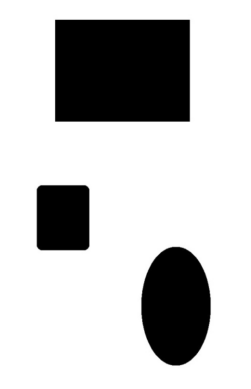

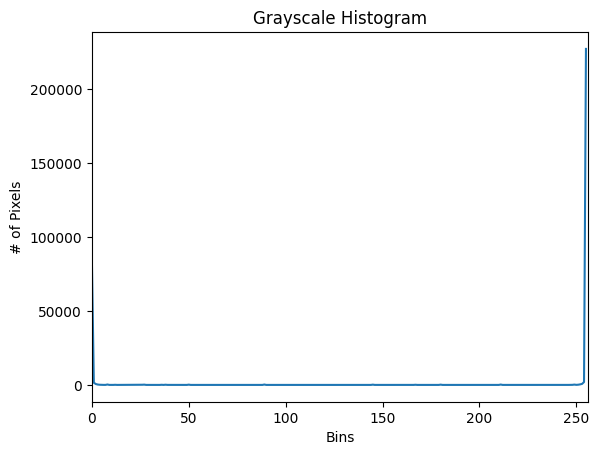

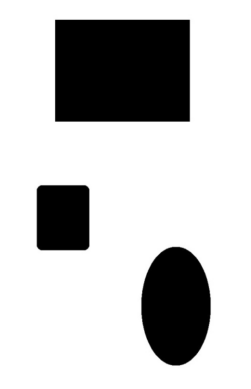

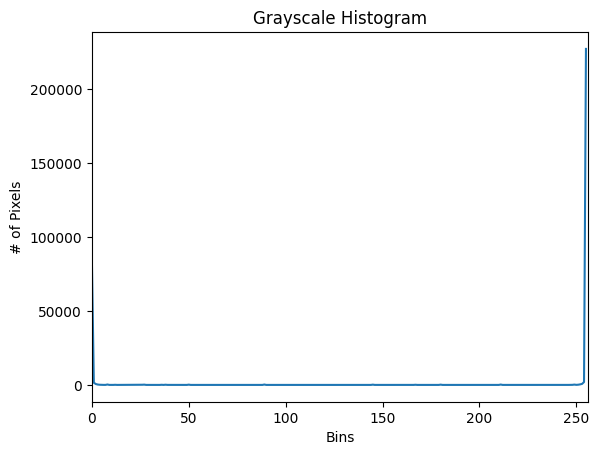

In [2]:
#Kalkulasi histogram dengan cv2.calcHist
from matplotlib import pyplot as plt
import cv2

# load the input image and convert it to grayscale
image = cv2.imread('gambar/gambar 7.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Pahami makna histogram yang dihasilkan pada gambar di atas. Dapat dilihat bahwa pada sumbu x=0, sumbu y berkisar 80000, kemudian pada sumbu x=255, sumbu y berkisar 220000. Maknanya histogram ini menunjukan bahwa gambar umumnya terdiri dari warna kehitaman sekitar 1/3 dari keseluruhan piksel, lalu warna keputihan sekitar 2/3 dari keseluruhan piksel (atau sisanya).

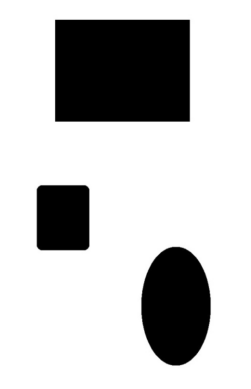

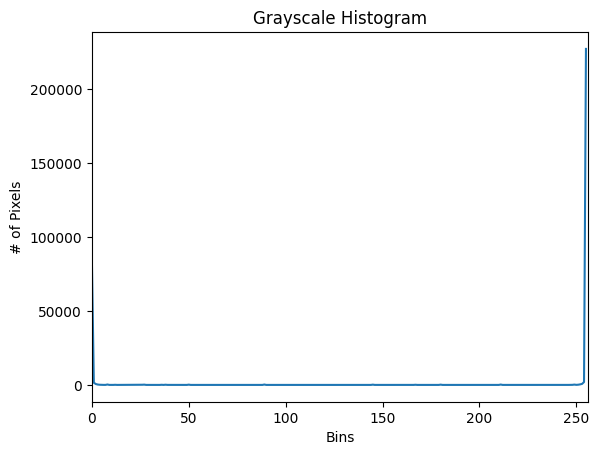

In [6]:
#Kita akan mencoba membuat histogram untuk gambar yang lain
#download di https://i.im.ge/2021/10/13/orsCTG.png
from matplotlib import pyplot as plt
import cv2

# load the input image and convert it to grayscale
image = cv2.imread('gambar/img6.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Pahami kembali makna histogram yang dihasilkan pada gambar di atas. Dapat dilihat bahwa warna kehitaman di awal berjumlah sekitar 2000, dan ini menunjukkan titik fokus menarik kita yaitu gambar remote. Kemudian warna keabuan yang jumlahnya sangat banyak (nilai sumbu y tinggi) menunjukkan background dari gambar ini. 

Silahkan anda mencoba membuat histogram untuk gambar-gambar lain, lalu pahami histogram dari gambar-gambar tersebut.

Histogram juga dapat dibuat untuk citra berwarna. Pada kode program berikut, kita akan membuat histogram untuk citra BGR.

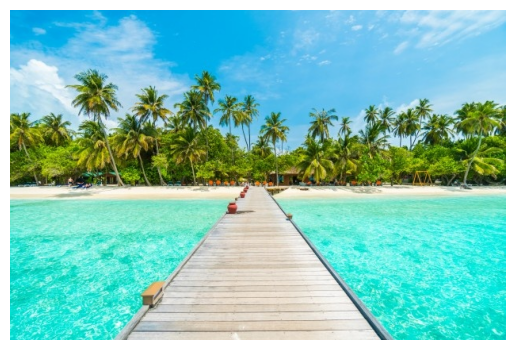

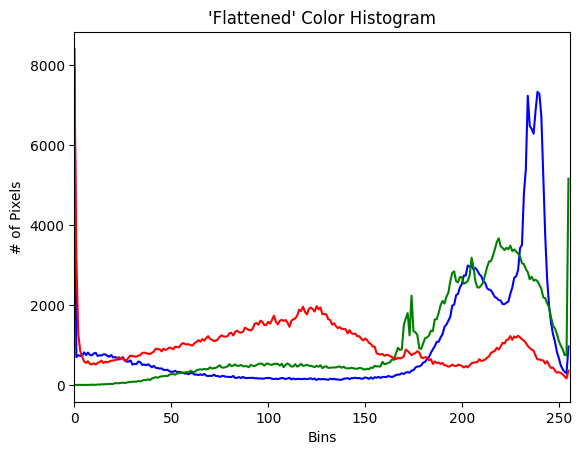

In [12]:
#Kalkulasi histogram untuk citra berwarna https://i.im.ge/2021/10/13/orIBvf.jpg
from matplotlib import pyplot as plt
import cv2

# load the input image 
image = cv2.imread('gambar/pantai.jpg')

# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color1) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color1)
    plt.xlim([0, 256])
plt.show()

Pada contoh sebelumnya, kita menghitung histogram untuk satu channel pada satu waktu. Berikut ini kita akan lihat histogram multi-dimensi yang menggunakan 2 channel pada satu waktu.

Histogram multi-dimensi akan dijelaskan dengan menggunakan kata AND. Contohnya kita ingin menjawab pertanyaan berikut:
- Berapa banyak piksel yang memiliki nilai Red 10 AND nilai Blue 30?
- Berapa banyak piksel yang memiliki nilai Green 200 AND nilai Red 130?
Dengan menggunakan konjungtif AND, kita dapat membuat histogram multi-dimensi. Perhatikan contoh berikut ini.


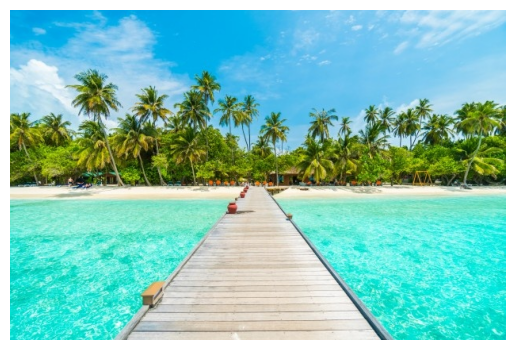

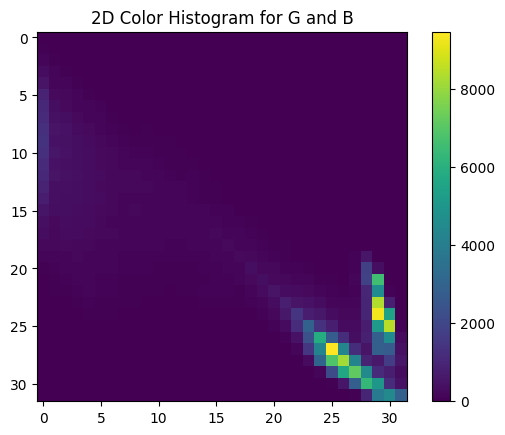

In [8]:
#Kalkulasi histogram untuk citra berwarna https://i.im.ge/2021/10/13/orIBvf.jpg
from matplotlib import pyplot as plt
import cv2

# load the input image 
image = cv2.imread('gambar/pantai.jpg')

# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# create a new figure and then plot a 2D color histogram for the
# green and blue channels
fig = plt.figure()
ax = fig.add_subplot(111)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
plt.show()

Pada histogram multi-dimensi di atas digunakan 32 bin. Sebab jika digunakan 256 bin untuk setiap dimensi pada histogram 2D maka hasil akhirnya menjadi 65536 (256x256) piksel yang harus dihitung. Hal ini bisa membuang-buang resource (memory) juga tidak praktis. Umumnya histogram multi-dimensi menggunakan 8-64 bin.

Apa makna dari 32 bin?

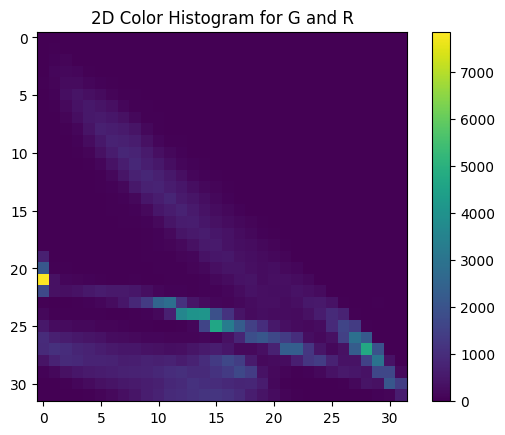

In [9]:
# plot a 2D color histogram for the green and red channels
fig = plt.figure()
ax = fig.add_subplot(111)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
plt.show()

2D histogram shape: (32, 32), with 1024 values


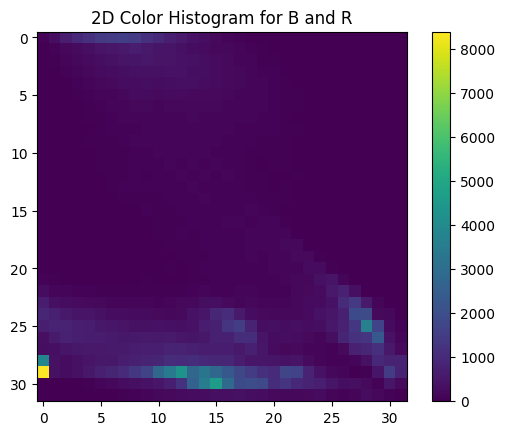

In [10]:
# plot a 2D color histogram for blue and red channels
fig = plt.figure()
ax = fig.add_subplot(111)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))
plt.show()

### Histogram equalization

Histogram equalization biasanya digunakan untuk meningkatkan kekontrasan pada citra. Menghitung nilai CDF (cumulative distributive function) merupakan cara yang umum digunakan untuk menyeimbangkan (*equalizing*) histogram dari suatu citra. Pada gambar 2 ditampilkan contoh perhitungan nilai CDF dan histogram yang didapat pada gambar 1. Kemudian gambar 3 menampilkan histogram equalization untuk gambar 2.

<b>Gambar 2. Contoh perhitungan CDF untuk histogram pada Gambar 1</b>
[![orU6zJ.png](https://i.im.ge/2021/10/13/orU6zJ.png)](https://im.ge/i/orU6zJ)

<b>Gambar 3. Gambar histogram equalization</b>
[![orUPOy.png](https://i.im.ge/2021/10/13/orUPOy.png)](https://im.ge/i/orUPOy)

Metode histogram equalization berguna pada citra yang mengandung foregroud dan background yang keduanya gelap atau keduanya terang. Terkadang hasilnya menjadi gambar yang kurang realistis. Namun metode ini biasanya digunakan untuk meningkatkan kekontrasan pada citra medical ataupun citra satelit. 

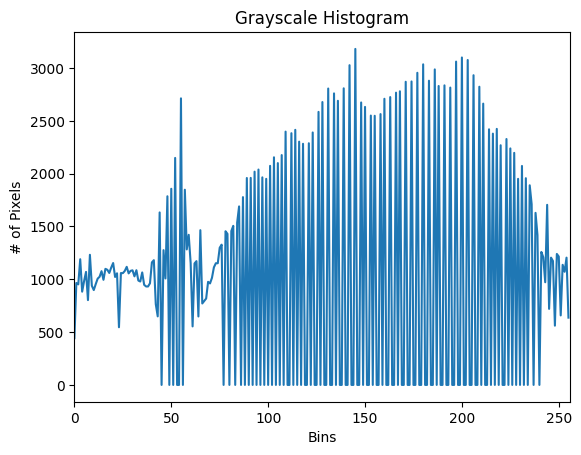

In [11]:
#load image dan ubah ke grayscale
image = cv2.imread('gambar/pantai.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(image)

cv2.imshow("Histogram Equalization", np.hstack([image, eq]))
cv2.waitKey(0)

# compute a grayscale histogram
hist = cv2.calcHist([eq], [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### Histogram dan mask

Pada penjelasan tentang method/fungsi calcHist terdapat parameter mask. Mask digunakan untuk memfokuskan pada region spesifik pada suatu citra. Berikut ini, kita akan coba membuat mask dan menhitung histogram hanya untuk bagian mask tersebut.


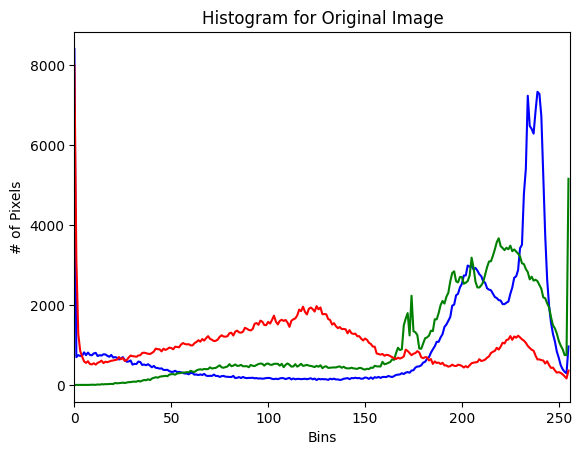

In [13]:
# Histogram pada mask region
from matplotlib import pyplot as plt
import numpy as np
import cv2

#we created function for easier call later
def plot_histogram(image, title, mask=None):
    # split the image into its respective channels, then initialize
    # the tuple of channel names along with our figure for plotting
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
        
# load the beach image and plot a histogram for it
image = cv2.imread('gambar/pantai.jpg')
plot_histogram(image, "Histogram for Original Image")
cv2.imshow("Original", image)
cv2.waitKey(0)
plt.show()

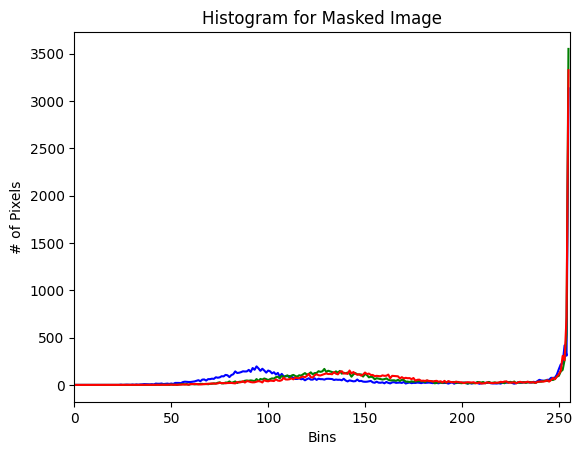

In [17]:
# construct a mask for our image; our mask will be *black* for regions
# we want to *ignore* and *white* for regions we want to *examine*
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
#coba mask ini
#cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)

# display the masked region
masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)

# compute a histogram for our image, but we'll only include pixels in
# the masked region

plot_histogram(image, "Histogram for Masked Image", mask=mask)

# show our plots
plt.show()

### Thresholding

Thresholding merupakan proses binerisasi pada citra. Secara umumnya, kita akan mengubah citra grayscale menjadi citra biner di mana pikselnya hanya boleh 0 atau 255. Cara thresholding yang paling sederhana adalah memilih suatu piksel bernilai p kemudian mengubah semua intensitas piksel yang kurang dari p menjadi 0, dan mengubah semua intensitas piksel yang lebih dari p menjadi 255. Dengan cara ini, kita telah membuat citra biner dari citra asal. Thresholding biasanya digunakan untuk memfokuskan objek atau kawasan yang menarik pada suatu citra. 

Thresholding secara umumnya ada 3 cara:
- Ada *simple thresholding* di mana kita menyediakan parameter untuk membuat citra biner. Cara ini berfungsi baik pada kondisi pencahayaan terkontrol di mana kita memastikan perbedaan kontras antara foreground dan background dari citra.
- Selain itu ada metode thresholding Otsu yang berusaha untuk lebih dinamis dan secara otomatis menghitung threshold optimal berdasarkan citra input.
- Dan terakhir ada *adaptive thresholding*. Thresholding yang lain menghandle citra secara keseluruhan dengan satu nilai saja. Namun pada *adaptive thresholding*, citra dipecah menjadi pecahan kecil dan melakukan threshold pada setiap pecahan tersebut secara terpisah dan individual.

#### Simple thresholding

Simple thresholding method memerlukan intervensi dari kita sebagai programer. Sebab kita perlu mendefinisikan secara spesifik berapa nilai threshold T yang akan digunakan. Di mana nanti semua intensitas piksel yang berada di bawah T akan diubah menjadi O, dan sebaliknya yang lebih dari T akan diubah menjadi 255. Kita juga dapat mengaplikasikan inverse dari proses binerisasi ini, yaitu dengan mengubah piksel dengan intensitas di bawah T menjadi 255, serta sebaliknya menjadi 0.


In [14]:
#Simple thresholding
import cv2

# load the image and display it
# https://i.im.ge/2021/10/14/or5pgW.jpg
image = cv2.imread("gambar/koin.jpg")
cv2.imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Applying Gaussian blurring helps remove some of the high frequency edges in the image 
# that we are not concerned with and allow us to obtain a more “clean” segmentation.
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
cv2.imshow("Image", image)
cv2.waitKey(0)


In [15]:
# apply basic thresholding -- 
# the first parameter is the image we want to threshold
# the second value is our threshold check (T)
# if a pixel value is less than T, we set it to be *black*, otherwise it is *white*
# silakan anda bereksperimen dengan nilai T lalu lihat perbedaannya
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)
cv2.waitKey(0)

-1

In [14]:
# if otherwise a pixel value is greater than T, we set it to black
# then we use cv2.THRESH_BINARY_INV
(T, threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inverse", threshInv)
cv2.waitKey(0)

-1

Umumnya kita ingin objek yang ingin disegmentasi muncul dengan warna putih pada background warna hitam, maka kita gunakan flag cv2.THRESH_BINARY_INV. Namun jika ingin objek yang dikaji muncul dengan warna hitam pada background putih, maka gunakan flag cv2.THRESH_BINARY

Berikutnya kita akan tampilkan objek foreground dan menyembunyikan yang lainnya. Kita akan manfaatkan masking dengan fungsi `cv2.bitwise_and`. Jadi 2 parameter pertama berupa citranya lalu masking menggunakan citra threshold yang inverted. 


In [15]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
cv2.imshow("Output", masked)
cv2.waitKey(0)

-1

In [16]:
# We will use another coin image and see the difference in the result
# https://i.im.ge/2021/10/14/or5JM0.jpg

import cv2

image = cv2.imread("gambar/koin1.jpg")
cv2.imshow("Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
cv2.imshow("Image", image)

(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)

(T, threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inverse", threshInv)

masked = cv2.bitwise_and(image, image, mask=threshInv)
cv2.imshow("Output", masked)
cv2.waitKey(0)

-1

Bandingkan hasil threshold dari kedua gambar koin yang telah dicoba di atas. Pada gambar pertama dengan nilai T=200 menghasilkan proses segmentasi yang berhasil. Namun pada gambar kedua, pada beberapa koin terdapat lubang di dalamnya. Hal ini karena pengujian thresholding gagal. Mengapa?

Walaupun tidak terlalu kentara, kedua gambar koin tersebut diambil pada kondisi pencahayaan (*lightning*) yang berbeda. Dan karena kita secara manual memberikan nilai thresholding, kita tidak bisa memastikan bahwa nilai threshold T yang sama juga akan bekerja secara baik pada citra lainnya, terutama karena adanya perubahan pencahayaan.

Solusi dari masalah ini yaitu dengan menggunakan metode Otsu ataupun *adaptive thresholding*.

#### Otsu thresholding

Pada kondisi sebenarnya, seringnya kita tidak memiliki informasi awal terkait dengan kondisi pencahayaan. Metode Otsu memungkinkan kita mencari nilai optimal untuk nilai T.

Metode Otsu berasumsi bahwa citra kita mengandung 2 class piksel yaitu background dan foreground. Metode Otsu juga berasumsi bahwa histogram grayscale dari citra yang dikaji adalah bi-modal, yang bermakna histogram memiliki 2 puncak.

Perhatikan gambar remote pada percobaan histogram sebelumnya. Pada gambar tersebut ada 2 puncak utama yang bermakna gambar ini adalah bi-modal. Puncak 1 adalah background sedangkan puncak 2 adalah foreground.

[![or9l8S.png](https://i.im.ge/2021/10/14/or9l8S.png)](https://im.ge/i/or9l8S)

Berdasarkan histogram grayscale, metode Otsu menghitung nilai threshold T yang optimal sehingga perubahan antara puncak background dan foreground menjadi minimal. Sebetulnya metode Otsu tidak memiliki informasi awal mengenai mana piksel termasuk foreground dan mana piksel termasuk background. Namun secara optimal berusaha untuk memisahkan puncak dari histogram.


In [16]:
#Otsu's thresholding method
import cv2

# load the image and display it
image = cv2.imread("gambar/koin.jpg")
cv2.imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Threshold", threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))

# visualize only the masked regions in the image
masked = cv2.bitwise_and(image, image, mask=threshInv)
cv2.imshow("Output", masked)
cv2.waitKey(0)
plt.show()

[INFO] otsu's thresholding value: 176.0


Nilai 0 yang diberikan pada `(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)` itu sebenarnya nilai bebas saja. Namun sebenarnya nilai T akan ditentukan dengan menggunakan `cv2.THRESH_OTSU`.

Karena kita tidak tahu berapa nilai T pada metode Otsu, makanya di sini dicetak `print("[INFO] otsu's thresholding value: {}".format(T))`. Nilai T di sini akan bergantung pada histogram dari citra yang dikaji dan akan dicari otomatis. Walaupun masih ada lubang pada gambar koin, namun ini tidak terlalu berpengaruh pada proses segmentasi antara foreground dan background.

Sesudah mencoba sendiri metode Otsu, kita dapat melihat bahwa metode ini dapat menghemat waktu dalam proses menebak dan mengecek nilai terbaik untuk nilai T. Namun demikian, ada beberapa kekurangan pada metode Otsu.
- metode Otsu mengasumsikan distribusi bi-modal pada intensitas piksel grayscale dari citra input. Namun jika kondisi sebenarnya tidak seperti itu, maka hasil dari metode Otsu menjadi di bawah standar.
- metode Otsu merupakan metode thresholding global. Jika citra yang ingin disegmen mendapat cukup warna kontras dari background, metode Otsu bisa digunakan. Namun apabila kondisi cahaya tidak seragam, seperti beberapa bagian dari citra mendapat lebih banyak pencahayaan dibanding bagian lainnya, maka hal ini dapat menimbulkan masalah. Untuk mengatasi masalah tersebut, kita akan menggunakan *adaptive thresholding*.

#### Adaptive thresholding

*Simple thresholding* dan *Otsu thresholding* sama-sama bekerja secara global, bermakna satu nilai T akan digunakan untuk keseluruhan bagian secara global pada citra tersebut. Namun ada kondisi di mana terdapat variasi pencahayaan, bayangan yang menjadikan satu nilai T hanya dapat bekerja dengan baik pada sebagian dari citra, namun gagal pada bagian lainnya. Masalah ini dapat diselesaikan dengan menggunakan *adaptive thresholding*. Lihat contoh gambar di bawah ini.

[![orydlp.png](https://i.im.ge/2021/10/14/orydlp.png)](https://im.ge/i/orydlp)

*Adaptive thresholding* mempertimbangkan sekumpulan set piksel yang bertetanggaan pada satu waktu, lalu menghitung nilai T untuk kawasan lokal spesifik tersebut dan melakukan proses segmentation. Kelebihan dari *adaptive thresholding* :
- mendapatkan segmentation yang lebih baik dibandingkan dengan metode *global thresholding*.
- menghindari proses yang memakan waktu dan komputasi yang mahal untuk melatih jaringan Mask R-CNN atau U-net.

*Adaptive thresholding* juga disebut sebagai *local thresholding*. Tujuan dari metode ini adalah untuk menguji secara statistik nilai intensitas piksel di sekitar piksel tertentu, p. Asumsi utama pada metode ini adalah kawasan lebih kecil pada suatu citra akan memiliki pencahayaan yang mirip, dibandingkan dengan citra secara keseluruhan yang bisa saja memiliki perbedaan pencahayaan untuk setiap kawasan. Namun pemilihan ukuran piksel yang bertetanggaan untuk melakukan *local thresholding* adalah sangat penting. 

Kawasan bertetanggaan (*neighborhood*) seharusnya cukup lebar untuk menutupi secukupnya piksel background dan foreground, jika tidak maka nilai T menjadi kurang relevan. Namun jika kawasan bertetanggaan terlalu lebar, maka kita menyalahi aturan asumsi bahwa kawasan lokal pada suatu citra akan memiliki pencahayaan yang mirip/seragam. Selain itu jika kawasan bertetanggaan terlalu lebar, hasil yang didapatkan menjadi mirip dengan *simple thresholding* atau *Otsu’s thresholding*.

Pada praktiknya, proses tuning ukuran kawasan bertetanggaan (*neighborhood*) bukanlah masalah yang rumit. Umumnya kita dapat menggunakan nilai rata-rata aritmetika atau rata-rata Gaussian dari intensitas piksel di setiap wilayah (ada metode lain namun ini yang paling populer). 

Pada metode rata-rata aritmetika, setiap piksel di lingkungan berkontribusi sama untuk menghitung T. Pada metode rata-rata Gaussian, nilai piksel yang lebih jauh dari pusat koordinat (x, y) wilayah berkontribusi lebih sedikit pada perhitungan T secara keseluruhan.

Rumus *adaptive thresholding*: `T = mean(IL) – C`.
- mean bisa menggunakan aritmetika atau Gaussian. 
- IL adalah sub-wilayah lokal dari gambar, I
- C adalah konstanta yang dapat kita gunakan untuk melakukan tuning nilai thresholding T.

In [3]:
# Mencoba berbagai cara thresholding
import cv2

# load the image and display it
image = cv2.imread("gambar/newspaper.png")
cv2.imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# apply simple thresholding with a hardcoded threshold value
(T, threshInv) = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Simple Thresholding", threshInv)

# apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("Otsu Thresholding", threshInv)

# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
cv2.imshow("Mean Adaptive Thresholding", thresh)

# perform adaptive thresholding again, this time using a Gaussian
# weighting versus a simple mean to compute our local threshold
# value
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 6)
cv2.imshow("Gaussian Adaptive Thresholding", thresh)
cv2.waitKey(0)

-1

Pada kedua *adaptive thresholding* di atas, kita menggunakan kawasan lokal 21x21. Pada `cv2.ADAPTIVE_THRESH_MEAN_C` digunakan nilai C=10. Sedangkan pada `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` digunakan nilai C=6. Nilai C ini dapat dilakukan tuning, untuk mendapatkan hasil terbaik.

## Latihan

1. Silakan coba semua code program pada materi ini. 
2. Apa sajakah kegunaan dari Histogram?
3. Apa sajakah kegunaan dari Thresholding?

# Jawab

1. sudah dicoba semua code pada materi ini

2. kegunaan dari Histogram adalah untuk melihat penyebaran intesitas warna. dari hasil penyebaran intesitas tersebut dapat diambil kesimpulan pada peningkatan kecerahan atau perenggangan kontras dll. dan juga merepresentasikan pertanse komposisi warna dan tekstur intensitas utuk kepentingan indentifikasi citra. histogram juga sering digunakan untuk penentuan batas-batas dalam pemisahan objek dari latar belakangnya.

3. kegunaan dari thresholding sendiri adalah untuk memisahkan antara objek dan backgorundnya dengan cara memanipulasi pixelnya, digunakan dalam edge detection, juga dapat mengubah citra grayscale menjadi citra biner